This code creates an animation from a Gala mockstream. When generating your mockstream, you need to include **"output_every = 1, output_filename='/filepath/file.hdf5'"** in your gen_stream.run( ) line to save timestep snapshots to an hdf5 file.

In [72]:
import astropy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import h5py

from astropy.table import Table
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

_ = ac.galactocentric_frame_defaults.set('v4.0')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.1)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    plt.subplots_adjust(wspace=.3)
    return cbar

In [73]:
file = h5py.File("/Users/aidencloud/school/research/Stream Team/datasets/snapshots.hdf5", 'r')
positions = Table(file['stream/pos'][:])
time = Table(file['stream/time'][:])

#optionally you could create a velocities table with Table(file['stream/vel'][:])

In [74]:
time_steps = len(time[0])

In [75]:
x = positions[0]
y = positions[1]
dt = 1 

#z positions would just be z = positions[2]

In [76]:
x_arr = np.array([np.array(i) for i in x])
y_arr = np.array([np.array(i) for i in y])

<IPython.core.display.Javascript object>


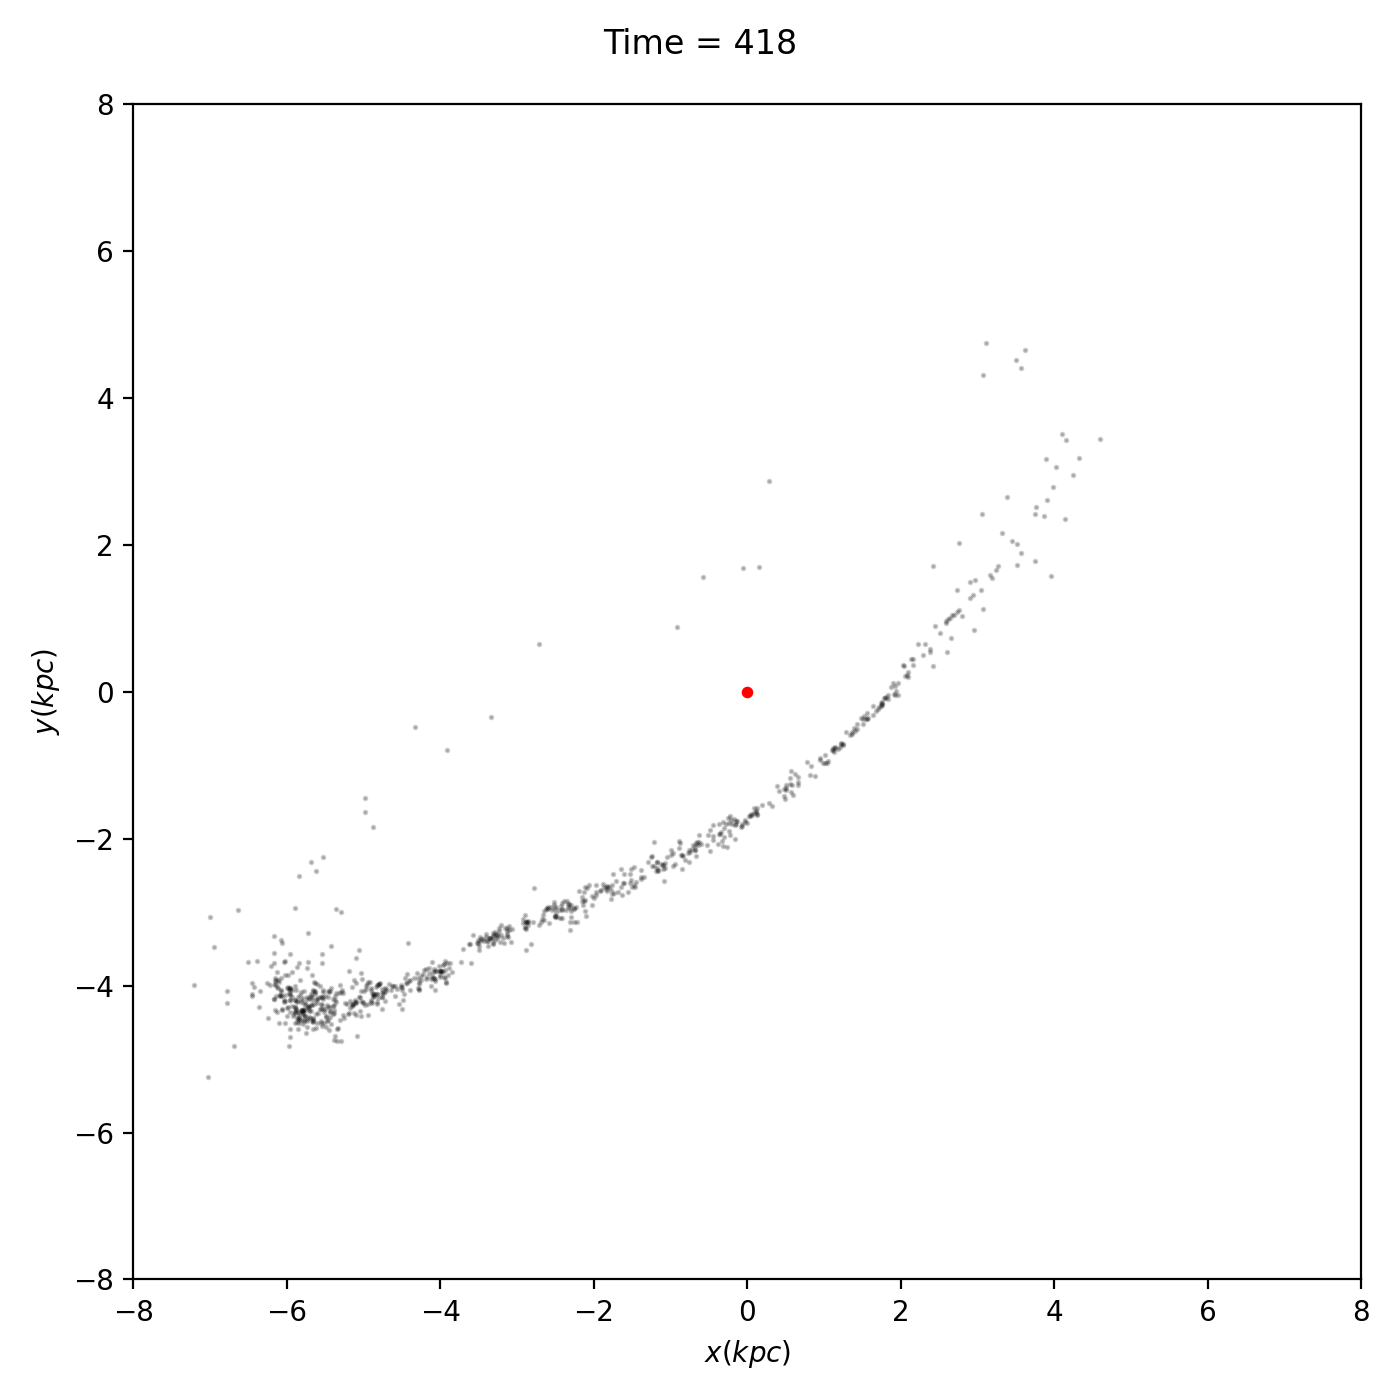

In [82]:
def animate(i) :
    ax.clear()
    
    ax.scatter(x_arr[i],y_arr[i], c='k', s=1, alpha=0.2)
    ax.scatter(0,0,c='r',s=10) #this is the galactic center
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    ax.set_xlabel('$x (kpc)$')
    ax.set_ylabel('$y (kpc)$')
    
    plt.suptitle(r'Time = {}'.format(np.around(i*dt, 1)))
    plt.tight_layout()
    plt.draw()
    
%matplotlib notebook
fig, ax = plt.subplots(1,1,figsize=(7,7))
ani = FuncAnimation(fig, animate, frames=time_steps, interval=0.5)